In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('http://www-bcf.usc.edu./~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [3]:
#visualizing
import seaborn as sns
%matplotlib inline

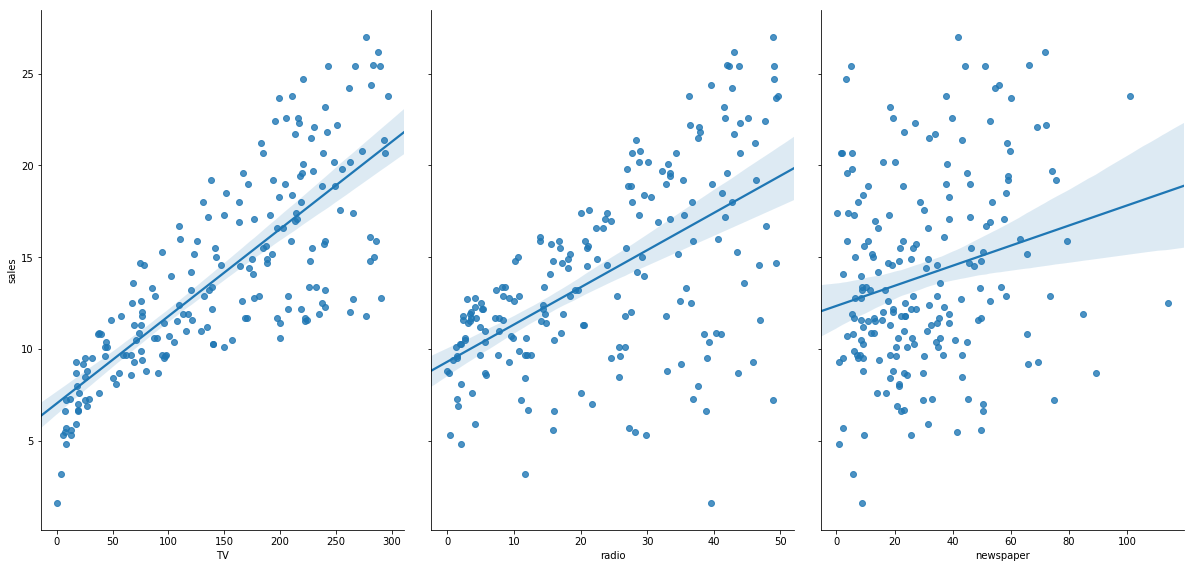

In [4]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=8,aspect=0.7,kind='reg')

In [ ]:
#Linear Regression is the best fit as the response and featues have a linear relationship.
# coefficients are determned using least squares, minimizes the squared eror


In [9]:
# feature matrix
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
X.shape
type(X)

pandas.core.frame.DataFrame

In [12]:
# Response
y=data['sales']
y.shape
type(y)

pandas.core.series.Series

In [16]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [21]:
X_test.shape
X_train.shape

(150, 3)

In [24]:
# building the linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#interpreting model coefficients
print (model.intercept_)
print(model.coef_)


2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [40]:
#prediction
y_pred=model.predict(X_test)

In [44]:
#Evaluation metric
#regresion ha a continuous response hence accuracy cannot be a valid metric
#common methods: MSE,MAE
#MAE
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MAE

1.0668917082595213

In [46]:
#MSE
MSE=metrics.mean_squared_error(y_test,y_pred)
MSE

1.9730456202283384

In [47]:
#RMSE
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

1.4046514230328955

In [48]:
# Feature Selection
# removing newspaper
feature_cols=['TV','radio']
X=data[feature_cols]
y=data['sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MSE=metrics.mean_squared_error(y_test,y_pred)
MSE
RMSE=np.sqrt(MSE)
RMSE

1.3879034699382888

In [ ]:
# inference model performs etter without newspaper ad as thy have no direct or strong correlation with the sales.